Preprocesamiento

In [1]:
import pandas as pd
df = pd.read_csv('cancer.csv', encoding='latin-1')
df.head()

Número            Tipo                                           Sintomas
0       0  Thyroid_Cancer  Thyroid surgery in  children in a single insti...
1       1  Thyroid_Cancer  " The adopted strategy was the same as that us...
2       2  Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3       3  Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
4       4  Thyroid_Cancer   This study aimed to investigate serum matrix ...

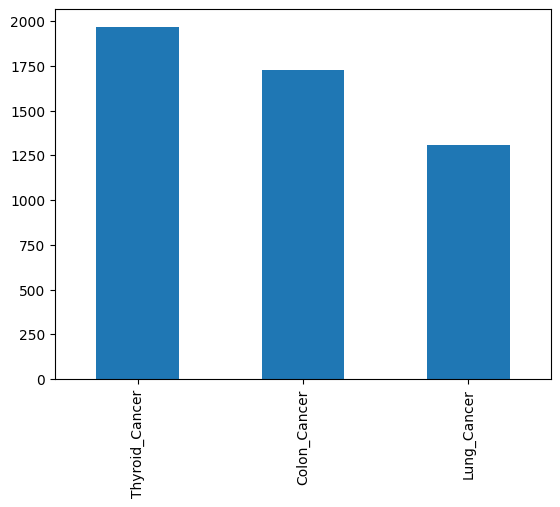

In [2]:
import matplotlib.pyplot as plt

# Crea la gráfica
df['Tipo'].head(5000).value_counts().plot(kind='bar')

# Guarda la gráfica en un archivo
plt.savefig('barras.png')

# Muestra la gráfica (opcional)
plt.show()

In [2]:
from utilidades import preprocesamiento

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aguas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df['clean_text'] = df['Sintomas'].apply(preprocesamiento)
df.head(5)

Número            Tipo                                           Sintomas  \
0       0  Thyroid_Cancer  Thyroid surgery in  children in a single insti...   
1       1  Thyroid_Cancer  " The adopted strategy was the same as that us...   
2       2  Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...   
3       3  Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...   
4       4  Thyroid_Cancer   This study aimed to investigate serum matrix ...   

                                          clean_text  
0  thyroid surgery child single institution osama...  
1  adopted strategy used prior year based four ex...  
2  coronary arterybypass grafting thrombosis ïbri...  
3  solitary plasmacytoma sp skull uncommon clinic...  
4  study aimed investigate serum matrix metallopr...

In [6]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Cuenta los n-gramas
def get_ngrams(text, n):
    tokens = word_tokenize(text.lower())  # Tokeniza y convierte el texto en minúsculas
    n_grams = list(ngrams(tokens, n))
    return [' '.join(gram) for gram in n_grams]

df['unigrams'] = df['clean_text'].apply(lambda x: get_ngrams(x, 1))
print("xd")
df['bigrams'] = df['clean_text'].apply(lambda x: get_ngrams(x, 2))
print("xd")
df['trigrams'] = df['clean_text'].apply(lambda x: get_ngrams(x, 3))
print("xd")
df['4-grams'] = df['clean_text'].apply(lambda x: get_ngrams(x, 4))

xd
xd
xd


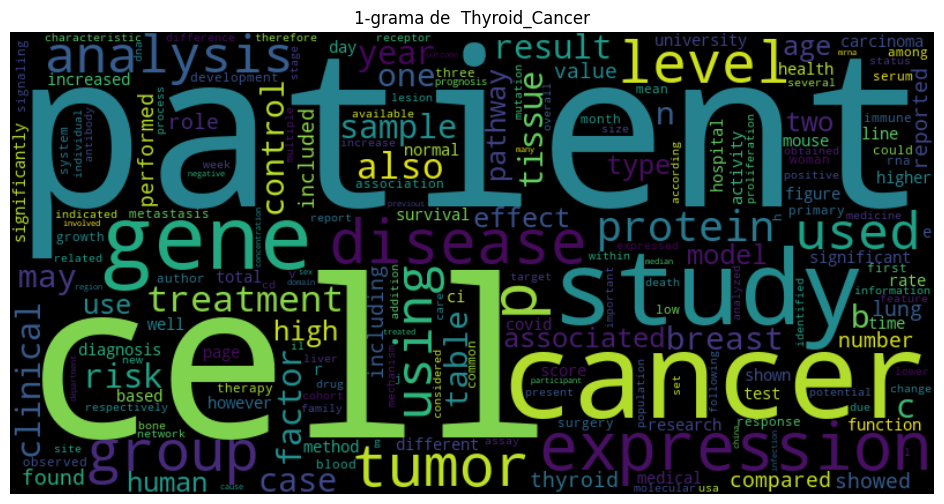

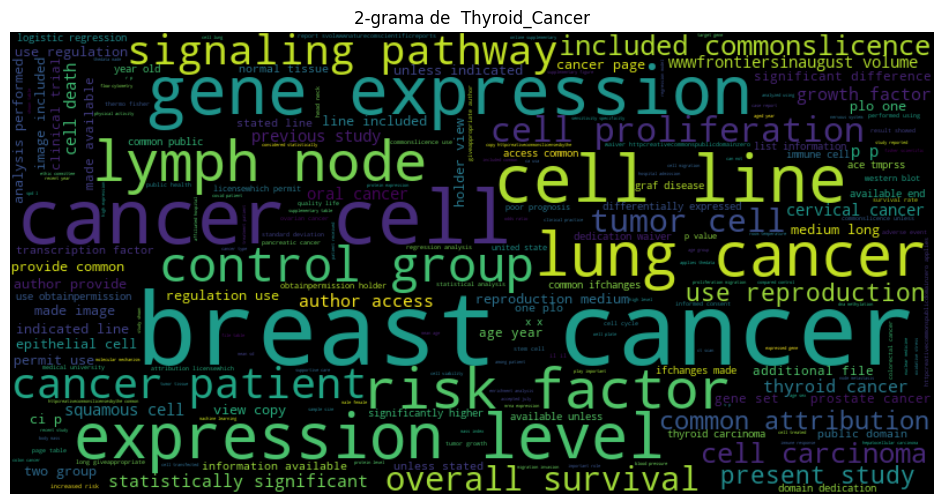

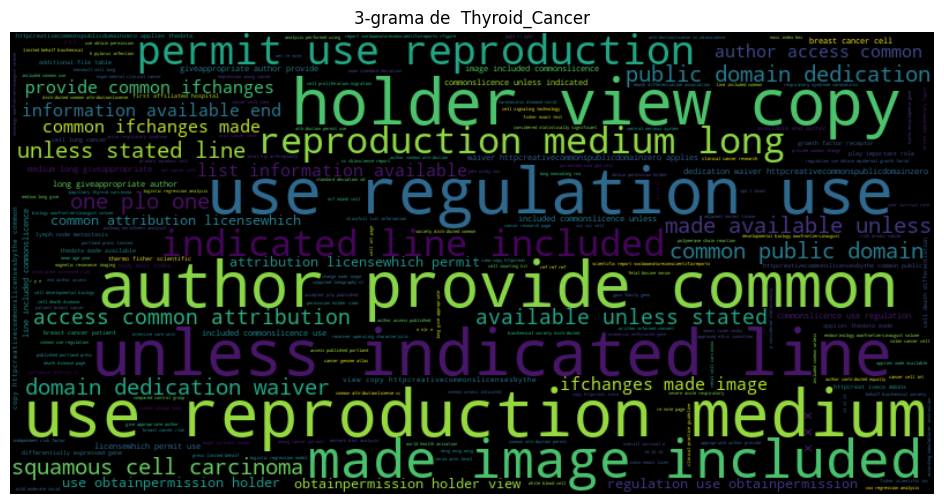

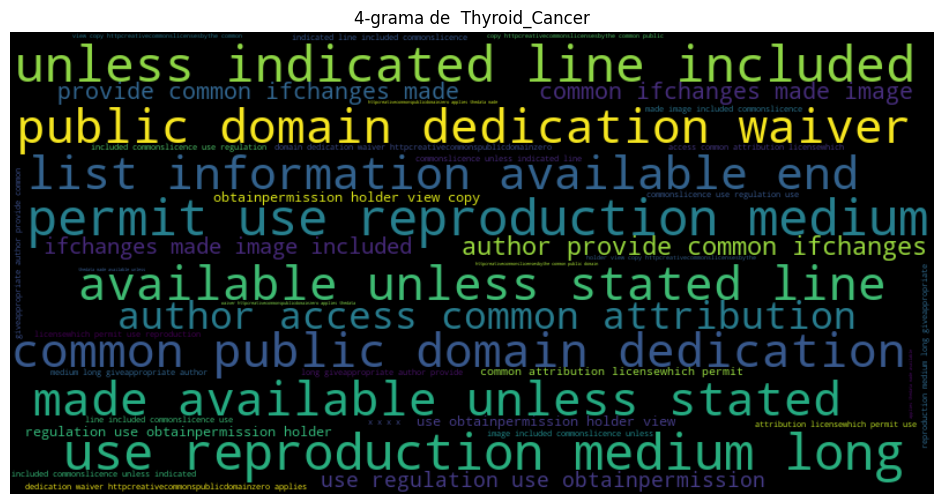

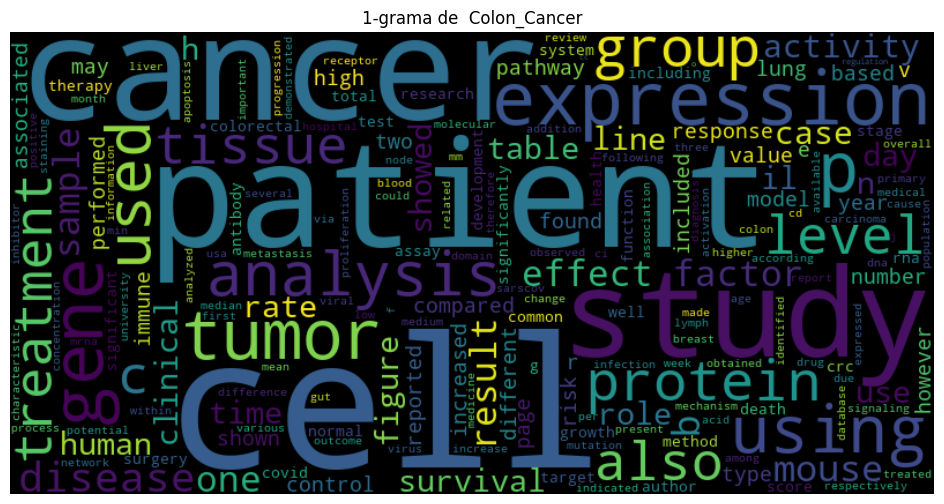

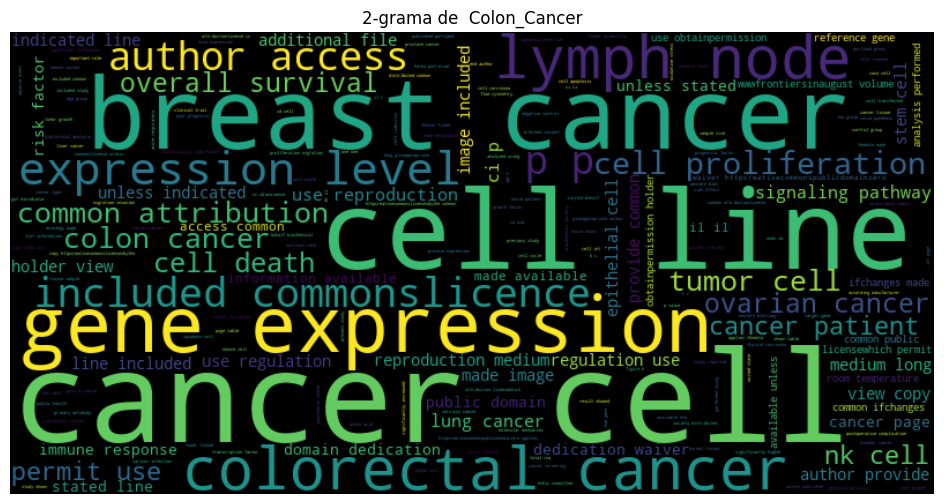

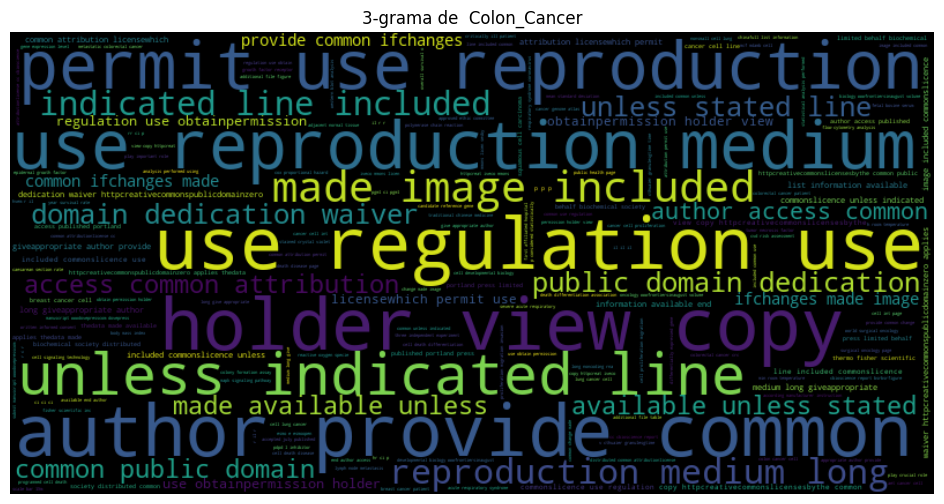

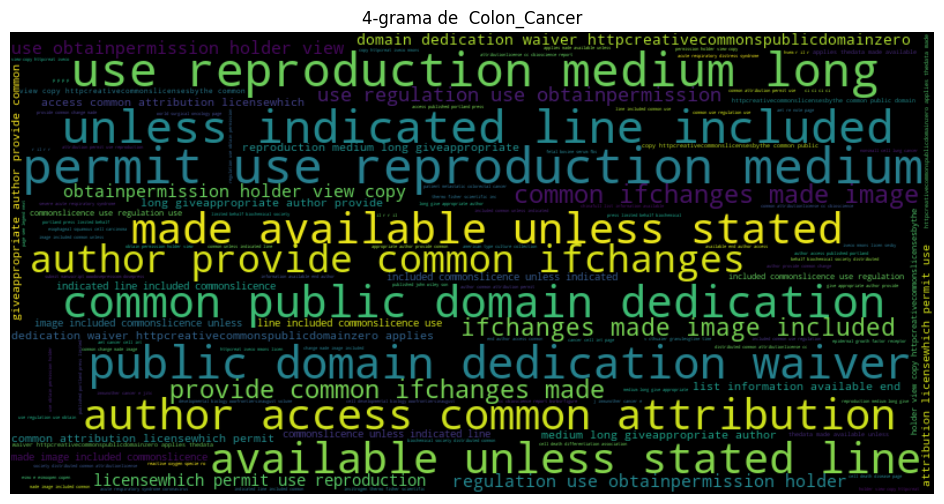

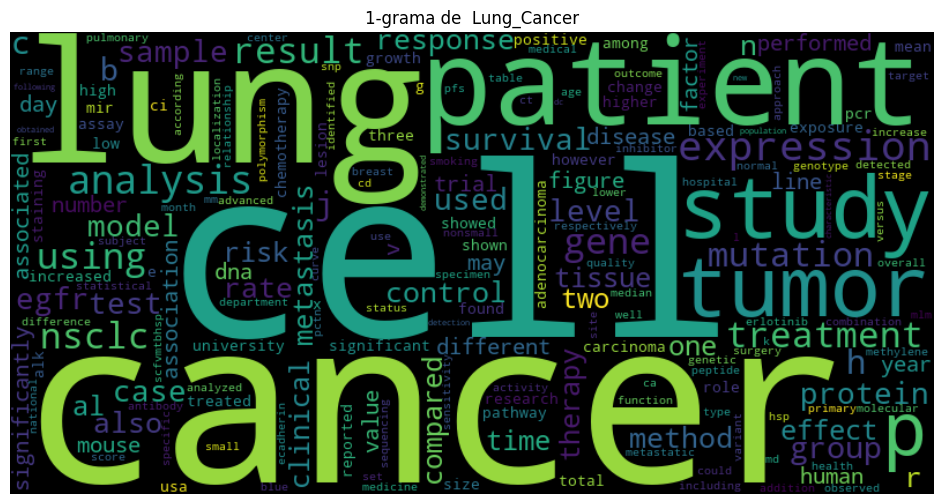

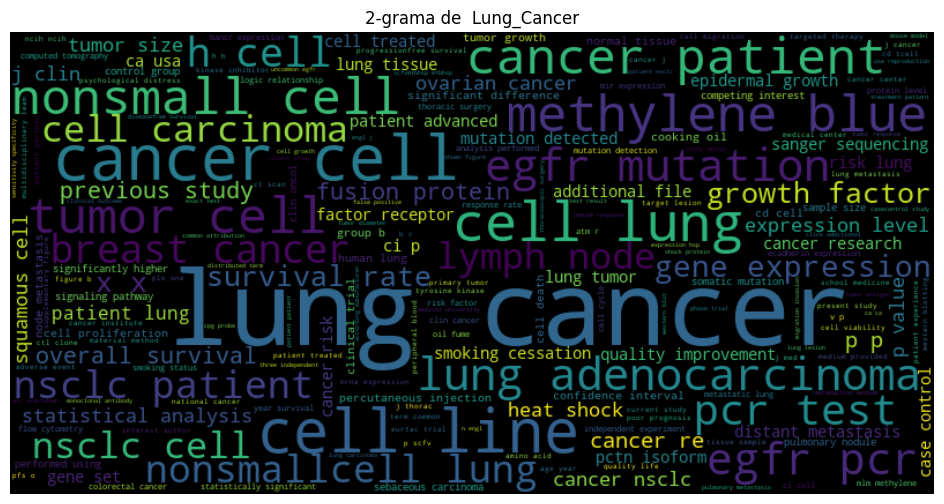

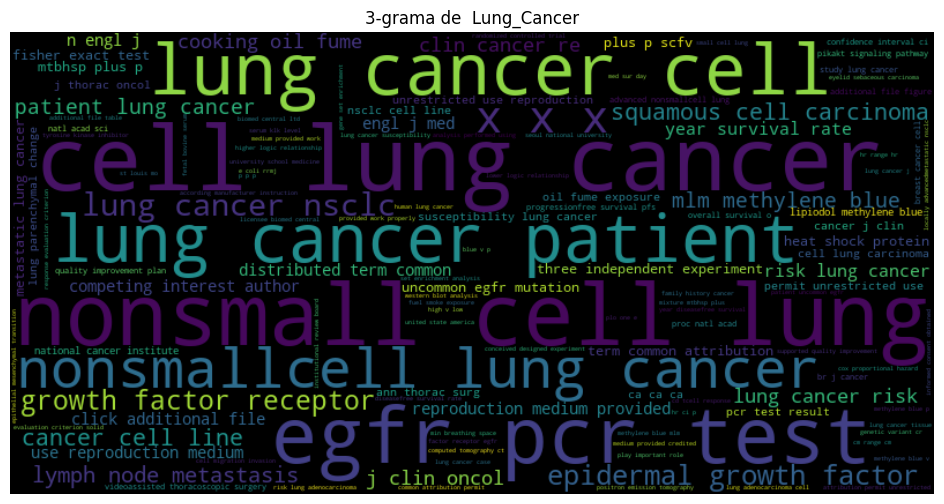

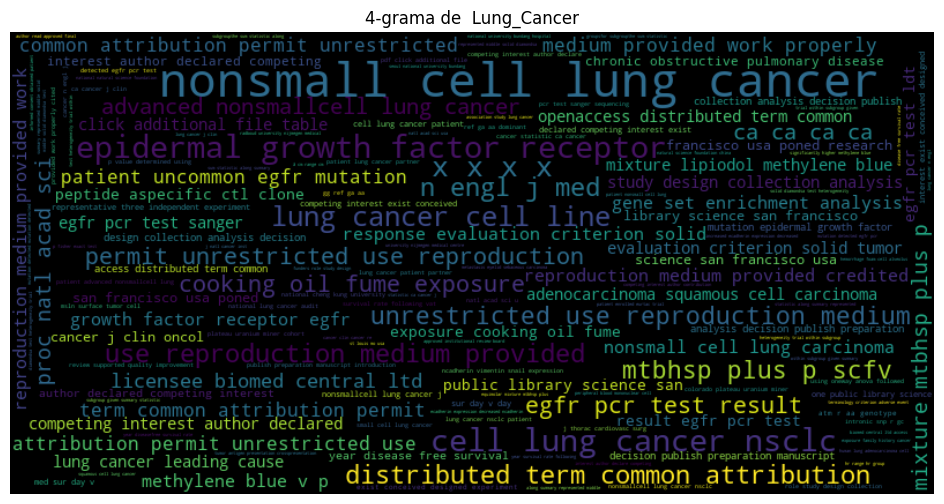

In [7]:
from wordcloud import WordCloud
# Obtiene la lista de autores únicos
authors = df['Tipo'].unique()

# Recorre cada autor y crea una nube de palabras para cada tipo de n-gram por frecuencia
for author in authors:
    author_data = df[df['Tipo'] == author]
    author_unigrams = [gram for grams in author_data['unigrams'] for gram in grams]
    author_bigrams = [gram for grams in author_data['bigrams'] for gram in grams]
    author_trigrams = [gram for grams in author_data['trigrams'] for gram in grams]
    author_4grams = [gram for grams in author_data['4-grams'] for gram in grams]

        # Calcula la frecuencia de cada tipo de n-gram
    unigram_freq = FreqDist(author_unigrams)
    bigram_freq = FreqDist(author_bigrams)
    trigram_freq = FreqDist(author_trigrams)
    n4gram_freq = FreqDist(author_4grams)
    i = 1
    for ngram in [unigram_freq, bigram_freq, trigram_freq, n4gram_freq]:
      wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(ngram)
      plt.figure(figsize=(12, 6))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(f'{i}-grama de  {author}')
      plt.axis('off')
      plt.savefig(f'{i}-grama de  {author}')
      plt.show()
      i = i+1

C:\Users\aguas\AppData\Local\Temp\ipykernel_12244\2520670829.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_1, shade=True, color = 'red').set_title('Distribución de palabras por tipo de cáncer')
C:\Users\aguas\AppData\Local\Temp\ipykernel_12244\2520670829.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_2, shade=True, color = 'blue')
C:\Users\aguas\AppData\Local\Temp\ipykernel_12244\2520670829.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_3, shade=True, color = 'green')


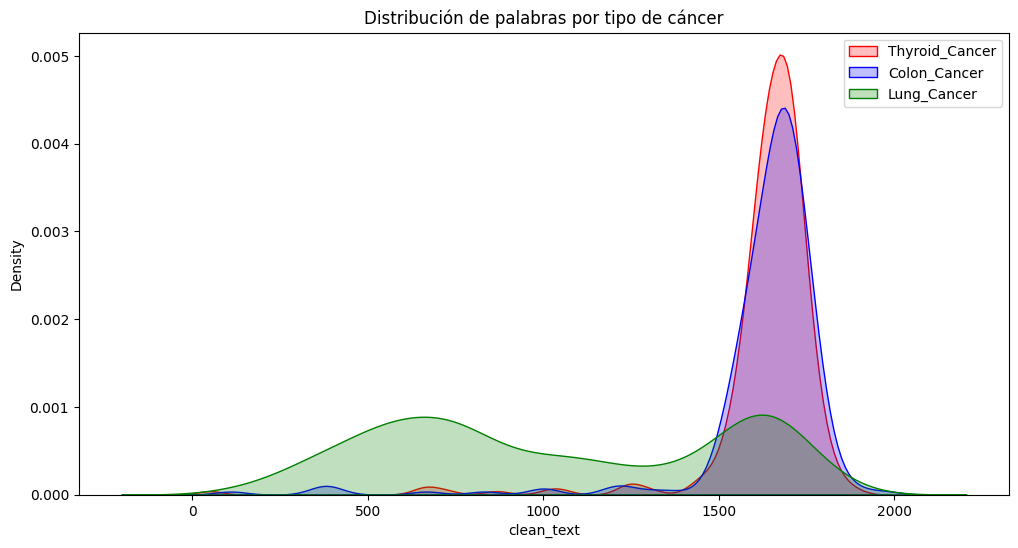

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
num_1 = df[df['Tipo']== 'Thyroid_Cancer']['clean_text'].apply(lambda x: len(x.split()))
num_2 = df[df['Tipo']== 'Colon_Cancer']['clean_text'].apply(lambda x: len(x.split()))
num_3 = df[df['Tipo']== 'Lung_Cancer']['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Distribución de palabras por tipo de cáncer')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'])
plt.show()

C:\Users\aguas\AppData\Local\Temp\ipykernel_10920\2833099284.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_1, shade=True, color = 'red').set_title('Distribución de palabras por tipo de cáncer')
C:\Users\aguas\AppData\Local\Temp\ipykernel_10920\2833099284.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_2, shade=True, color = 'blue')
C:\Users\aguas\AppData\Local\Temp\ipykernel_10920\2833099284.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_3, shade=True, color = 'green')


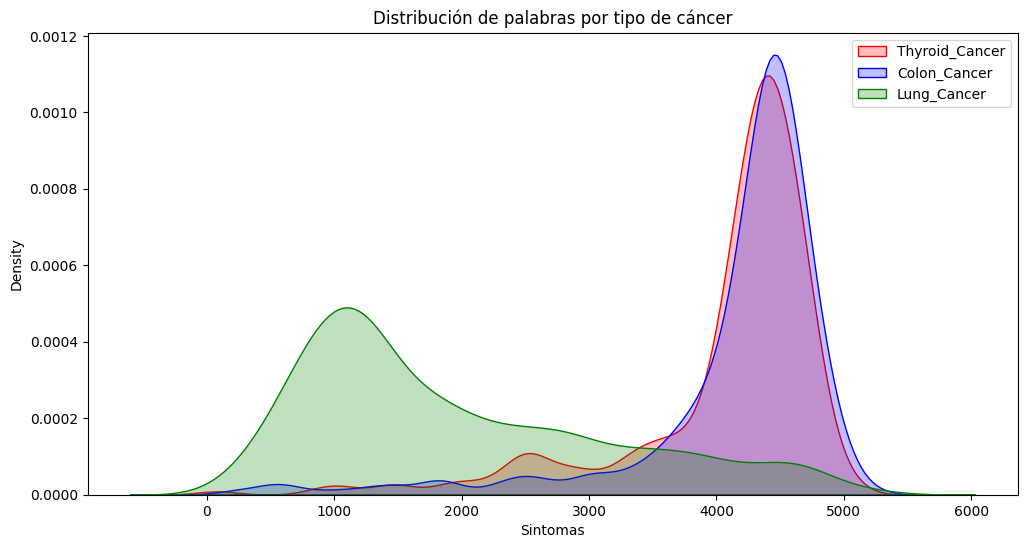

In [7]:
import seaborn as sns
num_1 = df[df['Tipo']== 'Thyroid_Cancer']['Sintomas'].apply(lambda x: len(x.split()))
num_2 = df[df['Tipo']== 'Colon_Cancer']['Sintomas'].apply(lambda x: len(x.split()))
num_3 = df[df['Tipo']== 'Lung_Cancer']['Sintomas'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Distribución de palabras por tipo de cáncer')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'])
plt.show()

In [ ]:
import joblib
joblib.dump(grid, 'grid.pkl')